<a href="https://colab.research.google.com/github/Noob919/Diabetes_Predictions/blob/main/Models/Backward_Selection/Logistic_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
path = "https://raw.githubusercontent.com/Noob919/Diabetes_Predictions/main/DataUsed/diabetes_binary_health_indicators_BRFSS2015.csv"
df =  pd.read_csv(path)
Scaler = StandardScaler()

In [4]:
X =  df.drop('Diabetes_binary', axis =1)
y = df['Diabetes_binary']
X_scaler = Scaler.fit_transform(X)

In [5]:
clflr = LogisticRegression(max_iter = 130)

In [6]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [7]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [8]:
sfs = SFS(clflr, 
           k_features= (1,21), 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_scaler,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   45.6s finished

[2022-07-23 21:08:03] Features: 20/1 -- score: 0.8633987701040682[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished

[2022-07-23 21:08:37] Features: 19/1 -- score: 0.8635249132765689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jo

In [9]:
info = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
info.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8616012298959319, 0.8641674550614948, 0.863...",0.862969,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002373,0.001054,0.000746
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8618614001892148, 0.8649361400189215, 0.863...",0.863399,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002825,0.001255,0.000888
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.862275307473983, 0.8646523178807947, 0.8636...",0.863525,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.002192,0.000974,0.000689
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...","[0.862287133396405, 0.8648888363292336, 0.8637...",0.863643,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...",0.002397,0.001065,0.000753
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15...","[0.8624408703878903, 0.8649006622516556, 0.863...",0.863639,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15...",0.002262,0.001005,0.000711


In [10]:
list_f = X.columns[[sfs.k_feature_idx_]]
list_f

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'DiffWalk'],
      dtype='object')

In [11]:
sfs.k_score_

0.863737779880164

In [12]:
df_f = X[list_f]
df_f.shape
X_f =  df_f
y = df['Diabetes_binary']
X_train_f, X_test_f, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)

In [13]:
X_train_f = Scaler.fit_transform(X_train_f)
X_test_f = Scaler.fit_transform(X_test_f) 
print("Shape of train set",X_train_f.shape)
print("Shape of test set",X_test_f.shape)

Shape of train set (177576, 12)
Shape of test set (76104, 12)


In [14]:
clflr = LogisticRegression(max_iter = 130)
clflr.fit(X_train_f, y_train)
pred  = clflr.predict(X_test_f)
print("Accuracy Score",accuracy_score(y_test,pred))
print("f1 Score",f1_score(y_test,pred))
print("Recall Score", recall_score(y_test,pred))
print('Precison Score', precision_score(y_test,pred))

Accuracy Score 0.8648691264585304
f1 Score 0.23550401427297057
Recall Score 0.15087151157253073
Precison Score 0.5364036572976634


Text(0.5, 1.0, 'Confusion metrics for Logistic Regression on Test Set')

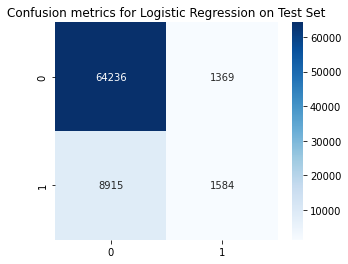

In [15]:
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Blues')
plt.title('Confusion metrics for Logistic Regression on Test Set')

Accuracy Score 0.8634612785511555
f1 Score 0.23826578699340245
Recall Score 0.15261399766571418
precison Score 0.5430330803379636


Text(0.5, 1.0, 'Confusion metrics for Logistic Regression on Train set')

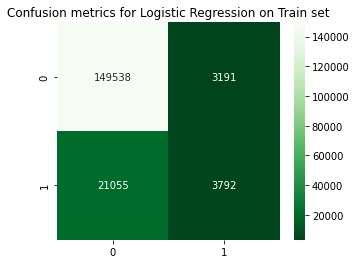

In [16]:
pred_train  = clflr.predict(X_train_f)
print("Accuracy Score",accuracy_score(y_train, pred_train))
print("f1 Score",f1_score(y_train, pred_train ))
print("Recall Score", recall_score(y_train, pred_train ))
print('precison Score', precision_score(y_train, pred_train ))
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Greens_r')
plt.title('Confusion metrics for Logistic Regression on Train set')

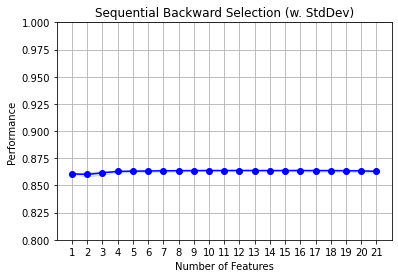

In [17]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()